In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )


db = mysql.connector.connect(host="localhost",
                            username="root",
                            password="root",
                            database="ecommerce")
cur = db.cursor()

# ::: Basic Queries :::

1. List all unique cities where customers are located.

In [2]:
query = """select distinct customer_city from customers"""

cur.execute(query)

data=cur.fetchall()
print("Unique distinct cities :: ")
data

Unique distinct cities :: 


[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

2. Count the number of orders placed in 2017.

In [3]:
# query = """select count(order_id) as number_of_orders from orders where left(order_purchase_timestamp,4)=2017"""
query = """select count(order_id) as number_of_orders from orders where Year(order_purchase_timestamp)=2017"""

cur.execute(query)

data = cur.fetchall()

print("::: Number of Order in Year 2017 :::")
data

::: Number of Order in Year 2017 :::


[(45101,)]

3. Find the total sales per category.

In [4]:
query = """select upper(products.product_category),
round(sum(payments.payment_value),2) from products 
join order_items 
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
GROUP BY products.product_category
"""

cur.execute(query)

data = cur.fetchall()

# print("::: Number of Order in Year 2017 :::")
data

[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

In [5]:
df= pd.DataFrame(data,columns=['Category','Total Sales'])

In [6]:
df

,Category,Total Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,FASHION BAGS AND ACCESSORIES,218158.28
4,BED TABLE BATH,1712553.67
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


4. Calculate the percentage of orders that were paid in installments.

In [7]:
query = """select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments"""

cur.execute(query)

data = cur.fetchall()

print("::: Percentage of orders that were paid in Installments :::")
data[0][0]

::: Percentage of orders that were paid in Installments :::


Decimal('99.9981')

5. Count the number of customers from each state. 

::: Count the number of customers from each state :::


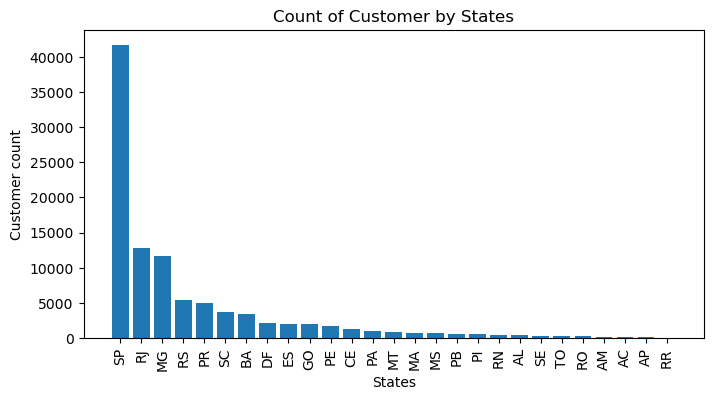

In [8]:
query = """select customer_state,count(customer_state) from customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()

print("::: Count the number of customers from each state :::")
# data
df=pd.DataFrame(data,columns=['state','customer count'])
df = df.sort_values(by='customer count',ascending=False)

plt.figure(figsize=(8,4))
plt.bar(df['state'],df['customer count'])
plt.xticks(rotation=90)

plt.xlabel("States")
plt.ylabel("Customer count")
plt.title("Count of Customer by States")

plt.show()

# ::: Intermediate Queries :::

1. Calculate the number of orders per month in 2018.

::: Number of orders per month in 2018 :::


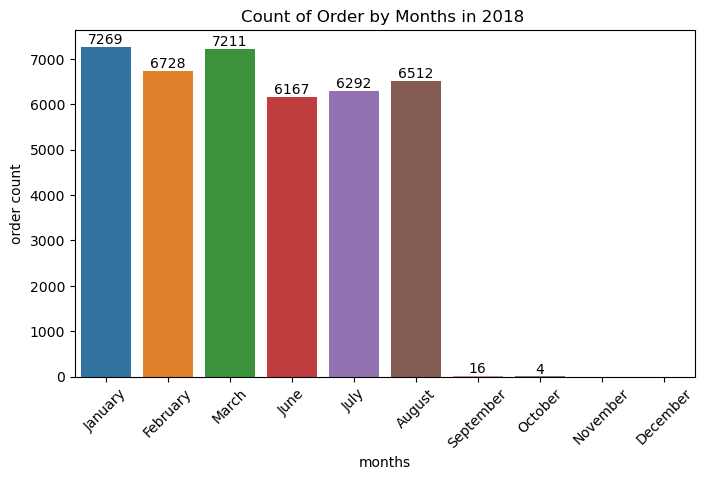

In [9]:
query = """
select monthname(order_purchase_timestamp) months,
count(order_id)
from orders
where Year(order_purchase_timestamp)=2018
Group by months
"""

cur.execute(query)

data = cur.fetchall()

print("::: Number of orders per month in 2018 :::")
# data
df = pd.DataFrame(data,columns=['months','order count'])


o = ["January","February","March","June","July","August","September","October","November","December"]

plt.figure(figsize=(8,4.5))
# ax = sns.barplot(x=df['months'],y=df['order count'],data=df,order=o,hue=df['months'],palette="viridis")
ax = sns.barplot(x=df['months'],y=df['order count'],data=df,order=o)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count of Order by Months in 2018 ")
plt.show()

2. Find the average number of products per order, grouped by customer city.

In [10]:
query = """
with count_per_order as (select orders.order_id ,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select concat(upper(substring(customers.customer_city,1,1)),lower(substring(customers.customer_city,2,length(customers.customer_city)))),round(avg(count_per_order.oc),2) as average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()

# print("::: Number of orders per month in 2018 :::")
# data

df = pd.DataFrame(data,columns=['Customer City','Average Order'])
df.head(10)

,Customer City,Average Order
0,Padre carvalho,7.00
1,Celso ramos,6.50
2,Candido godoi,6.00
3,Datas,6.00
4,Matias olimpio,5.00
5,Morro de sao paulo,4.00
6,Cidelandia,4.00
7,Picarra,4.00
8,Teixeira soares,4.00
9,Curralinho,4.00


3. Calculate the percentage of total revenue contributed by each product category.

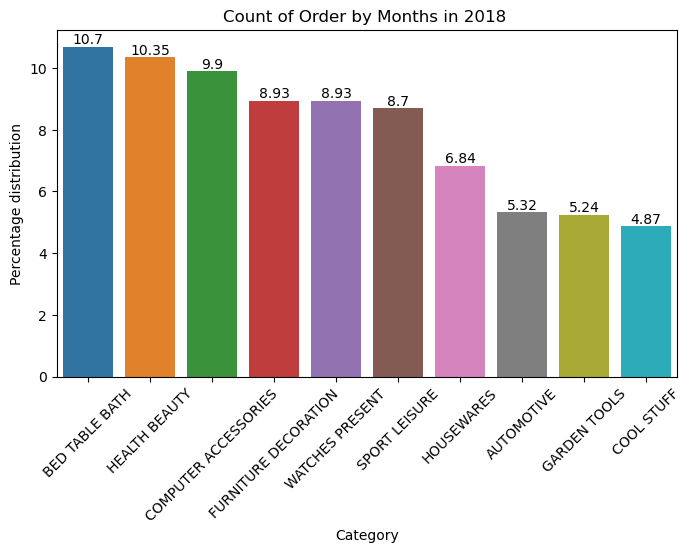

In [11]:
query = """select upper(products.product_category),
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as percentage from products 
join order_items 
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
GROUP BY products.product_category
order by percentage desc
"""

cur.execute(query)

data = cur.fetchall()

# print("::: Number of Order in Year 2017 :::")
# data
df= pd.DataFrame(data,columns=['Category','Percentage distribution'])
df=df.head(10)


plt.figure(figsize=(8,4.5))
# ax = sns.barplot(x=df['months'],y=df['order count'],data=df,order=o,hue=df['months'],palette="viridis")
ax = sns.barplot(x=df['Category'],y=df['Percentage distribution'],data=df.head(10))
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count of Order by Months in 2018 ")
plt.show()

4. Identify the correlation between product price and the number of times a product has been purchased.

In [12]:
query = """
select upper(products.product_category),
count(order_items.product_id) as purchaseCount,
round(avg(order_items.price),2) as avgPrice
from order_items
join products on
order_items.product_id = products.product_id
Group by products.product_category
"""

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data,columns=['Category','Count','Average'])
# df.head()

#Correlation
arr1 = df['Count']
arr2 = df['Average']

a=np.corrcoef([arr1,arr2])
print('The correlation between Product Price and the Number of Times a Product has been purchased => ',a[0][1])

The correlation between Product Price and the Number of Times a Product has been purchased =>  -0.10631514167157562


As you can above , diagonally values are near to 0 , it means there is neutral relation between both Count and Average

HENCE

No propotional relation between both

5. Calculate the total revenue generated by each seller, and rank them by revenue.

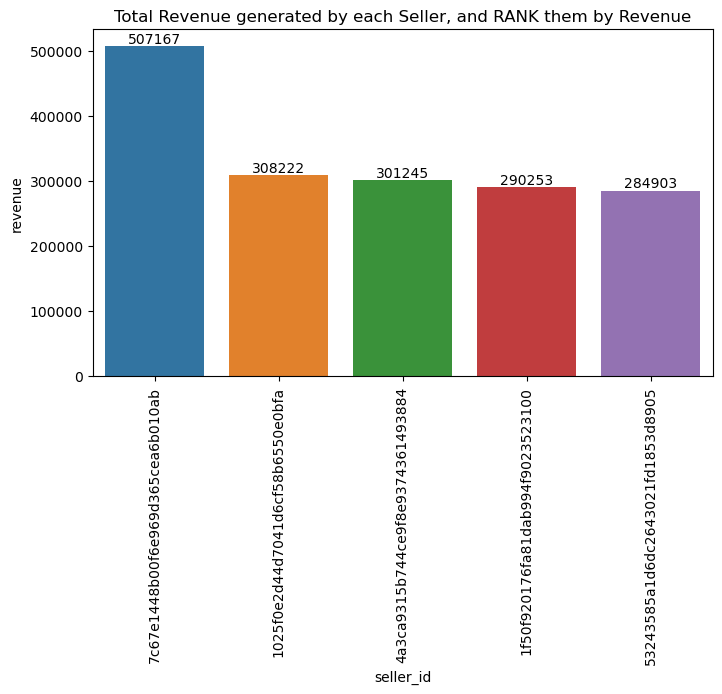

In [13]:
query = """select *,dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id , 
round(sum(payments.payment_value),2) as revenue
from order_items join payments on
order_items.order_id = payments.order_id
Group by order_items.seller_id) as a
"""

cur.execute(query)

data = cur.fetchall()

data

df=pd.DataFrame(data,columns=['seller_id','revenue','rank'])
df=df.head()

plt.figure(figsize=(8,4.5))
ax = sns.barplot(x="seller_id",y="revenue",data=df)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.title("Total Revenue generated by each Seller, and RANK them by Revenue")
plt.show()

# ::: Advanced Queries :::

1. Calculate the moving average of order values for each customer over their order history.

In [14]:
query = """select customer_id,order_purchase_timestamp,
round(avg(payment) over(
partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row
),2) as mov_avg
from
(select orders.customer_id , orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a
"""

cur.execute(query)

data = cur.fetchall()

data

df=pd.DataFrame(data,columns=['customer_id','order time','moving average'])
df.head()

,customer_id,order time,moving average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01


2. Calculate the cumulative sales per month for each year.

In [15]:
query = """
select years,months,payment,sum(payment)
over(order by years,months) cumulativeSales from
(select 
year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments 
on orders.order_id = payments.order_id
group by years,months
order by years,months) as a
"""

cur.execute(query)

data = cur.fetchall()

data

df=pd.DataFrame(data,columns=['year','month','payment','cumulative payment'])
df

,year,month,payment,cumulative payment
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


3. Calculate the year-over-year growth rate of total sales.

In [16]:
query = """
with a as(select 
year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orders join payments 
on orders.order_id = payments.order_id
group by years
order by years) select years,payment,
((payment-lag(payment,1) over(order by years))
/lag(payment,1) over(order by years))*100 from a
"""

cur.execute(query)

data = cur.fetchall()

data

df=pd.DataFrame(data,columns=['years','sales','yoy % growth'])
df 

,years,sales,yoy % growth
0,2016,59362.34,NaN
1,2017,7249746.73,12112.703761
2,2018,8699763.05,20.000924


4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [21]:
query = """
with a as (
select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id
),
b as (
select a.customer_id,count(distinct orders.order_purchase_timestamp)
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
group by a.customer_id
)

select 100 *(count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id
"""

cur.execute(query)

data = cur.fetchall()

data

[(None,)]

5. Identify the top 3 customers who spent the most money in each year.

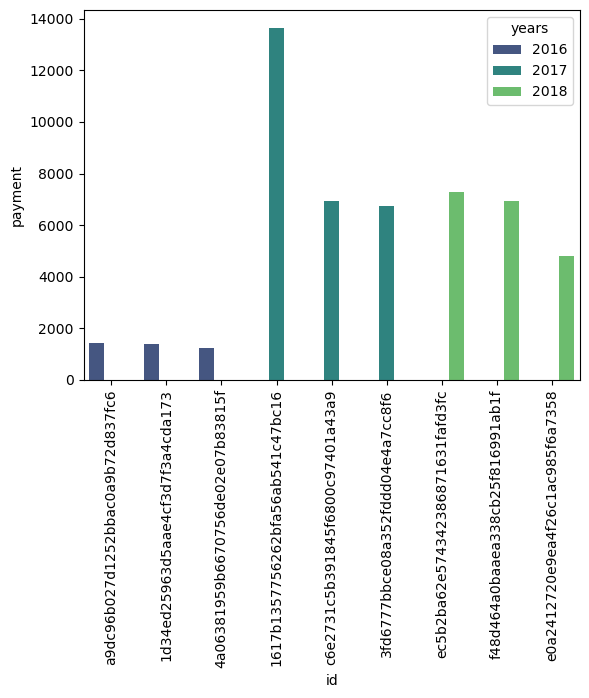

In [33]:
query = """
select years,customer_id,payment,d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a where d_rank <=3
"""

cur.execute(query)

data = cur.fetchall()

data


df=pd.DataFrame(data,columns=['years','id','payment','rank'])
df 


sns.barplot(x='id',y='payment',data=df,hue='years',palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [ ]:
::: END :::